# Importing required libraies

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
import cv2

# Dataset link

# <a href="https://github.com/spMohanty/PlantVillage-Dataset/tree/master/raw/color">to download dataset</a>

### <p> This dataset contain different types of leaf and there corresponding nature</p>

# checking size of image

In [3]:
data=sorted(glob("D:/assignment/PlantVillage-Dataset-master/PlantVillage-Dataset-master/train/*/*"))

In [4]:
img=plt.imread(data[0])

(256, 256, 3)


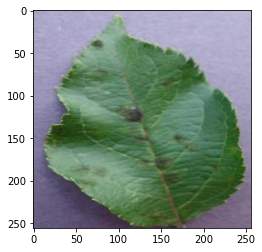

In [5]:
print(img.shape)
plt.imshow(img)


# Image Augmentation



In [4]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:



train_datagen = ImageDataGenerator(preprocessing_function=
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase

In [7]:
training_set = train_datagen.flow_from_directory('D:/assignment/PlantVillage-Dataset-master/PlantVillage-Dataset-master/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 54305 images belonging to 38 classes.


In [8]:
len(training_set),1698*32

(1698, 54336)

# Building and  Training Our Model

In [9]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [10]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=38, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

### Adding MOdelcheckpoints,ModelCheckpoint,EarlyStopping, CSVLogger

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, CSVLogger


In [12]:
filepath="./improvement-{epoch:08d}.hdf5"

checkpoint = ModelCheckpoint(filepath, period=5) 



#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.







#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('my_logs.csv', separator=',', append=False)
# saver = CustomSaver()
callbacks_list = [checkpoint, early_stop, log_csv]

In [22]:
model = load_model(r'D:\assignment\PlantVillage-Dataset-master\PlantVillage-Dataset-master\improvement-00000005.hdf5',compile=False)

In [23]:
model.compile(
  optimizer="adam",
  loss="categorical_crossentropy",
  metrics=['acc'])

In [24]:
from tensorflow.keras.models import load_model

In [25]:
with tf.device('/gpu:0'):
    r = model.fit_generator(
      training_set,
      epochs=20,
      steps_per_epoch=len(training_set),callbacks=callbacks_list
    )

Epoch 1/20
1698/1698 [==============================] - 1041s 612ms/step - loss: 0.1933 - acc: 0.9447
Epoch 2/20
1698/1698 [==============================] - 1039s 612ms/step - loss: 0.1701 - acc: 0.9509
Epoch 3/20
1698/1698 [==============================] - 1039s 612ms/step - loss: 0.1721 - acc: 0.9509
Epoch 4/20
1698/1698 [==============================] - 1042s 614ms/step - loss: 0.1640 - acc: 0.9523
Epoch 5/20
1698/1698 [==============================] - 1038s 611ms/step - loss: 0.1650 - acc: 0.9535
Epoch 6/20
1698/1698 [==============================] - 1038s 611ms/step - loss: 0.1605 - acc: 0.9544
Epoch 7/20
1698/1698 [==============================] - 1049s 618ms/step - loss: 0.1487 - acc: 0.9572
Epoch 8/20
1698/1698 [==============================] - 1042s 613ms/step - loss: 0.1544 - acc: 0.9563
Epoch 9/20
1698/1698 [==============================] - 1059s 623ms/step - loss: 0.1528 - acc: 0.9562
Epoch 10/20
1698/1698 [==============================] - 1097s 646ms/step - loss: 

KeyboardInterrupt: 

In [26]:
model.save('leaf_classification.hdf5')

# Vgg16 model

In [5]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [6]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator




train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase

In [10]:
training_set = train_datagen.flow_from_directory('D:/assignment/PlantVillage-Dataset-master/PlantVillage-Dataset-master/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 54305 images belonging to 38 classes.


In [11]:
len(training_set),1698*32

(1698, 54336)

In [18]:
training_set[0][0][0].shape

(128, 128, 3)

In [19]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [20]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in vgg16_model.layers:
    layer.trainable = False

x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=38, activation='softmax')(x)
model = Model(vgg16_model.input, output)


model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

# Adding MOdelcheckpoints,ModelCheckpoint,EarlyStopping, CSVLogger

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, CSVLogger

In [23]:
filepath="./improvement_vgg16-{epoch:08d}.hdf5"

checkpoint = ModelCheckpoint(filepath, save_freq='epoch',save_best_only=True,monitor='loss') 



#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.







#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('my_logs.csv', separator=',', append=False)
# saver = CustomSaver()
callbacks_list = [checkpoint, early_stop, log_csv]

In [24]:
model.compile(
  optimizer="adam",
  loss="categorical_crossentropy",
  metrics=['acc'])

In [25]:
from tensorflow.keras.models import load_model

In [26]:
with tf.device('/gpu:0'):
    history = model.fit_generator(
      training_set,
      epochs=10,
      steps_per_epoch=len(training_set),callbacks=callbacks_list
    )

C:\Users\saich\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1698/1698 [==============================] - 1360s 801ms/step - loss: 0.9593 - acc: 0.7063
Epoch 2/10
1698/1698 [==============================] - 3211s 2s/step - loss: 0.5466 - acc: 0.8186
Epoch 3/10
1698/1698 [==============================] - 1254s 738ms/step - loss: 0.4714 - acc: 0.8416
Epoch 4/10
1698/1698 [==============================] - 1319s 777ms/step - loss: 0.4315 - acc: 0.8564
Epoch 5/10
1698/1698 [==============================] - 1403s 826ms/step - loss: 0.4020 - acc: 0.8663
Epoch 6/10
1698/1698 [==============================] - 1387s 817ms/step - loss: 0.3855 - acc: 0.8704
Epoch 7/10
1698/1698 [==============================] - 1284s 756ms/step - loss: 0.3711 - acc: 0.8766
Epoch 8/10
1698/1698 [==============================] - 1283s 756ms/step - loss: 0.3550 - acc: 0.8804
Epoch 9/10
1698/1698 [==============================] - 1289s 759ms/step - loss: 0.3517 - acc: 0.8822
Epoch 10/10
1698/1698 [==============================] - 1265s 745ms/step - loss: 0.3

# Making Predictions

In [21]:
from tensorflow.keras.models import load_model
import cv2

In [30]:
model=load_model("leaf_classification.hdf5")

In [31]:
def detect(frame):
    img=cv2.resize(frame,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #scaling to 0 to 1 range 
    if(np.max(img)>1):
            img = img/255.0
    img=np.array([img])
    
    prediction=model.predict(img)
    label=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
    prediction=np.argmax(prediction)
    print(label[prediction])
    print("Prediction:",prediction)
    

In [32]:
path=r'D:\assignment\PlantVillage-Dataset-master\PlantVillage-Dataset-master\train\Peach___healthy\0a2ed402-5d23-4e8d-bc98-b264aea9c3fb___Rutg._HL 2471.JPG'

In [33]:
image=cv2.imread(path)

In [34]:
detect(image)

Peach___healthy
Prediction: 17


In [71]:
# import os

In [72]:
# all_subdirs = [d for d in os.listdir(r'D:\assignment\PlantVillage-Dataset-master\PlantVillage-Dataset-master\train')]

In [73]:
# all_subdirs

# Developed the app link is given below

# <a href="https://github.com/saichand018/leaf_detection_with_flask">Github link</a>